In [2]:
from textwrap import dedent
import os
import pickle
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from dltools.cov.markup import compute, compute_err

In [3]:
df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]

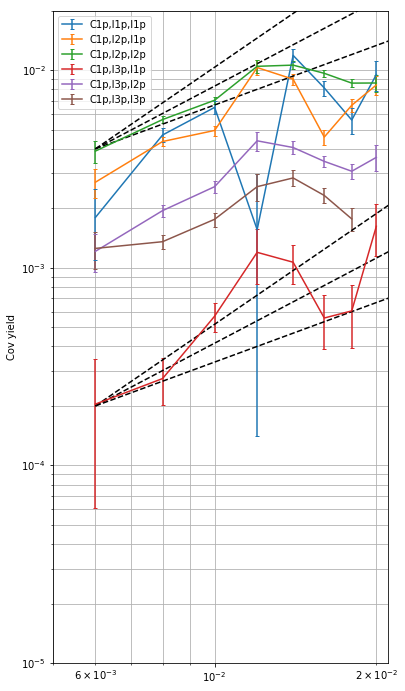

In [4]:
from textwrap import dedent
import os
import pickle
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]
del df, where


step = 0.002
edges = np.arange(0.005, 0.021, step)
xkey, ykey = "ke", "sumke"

plt.figure(figsize=(6, 12))
for _, m in info[info["target"].str.startswith("C1p")].iterrows():
    note = dedent("""\
          target = {target}
            flag {flag}
               p = {p}
          pz(h0) = {h0pz}
        phiy(h1) = {h1phiy}

        Yields are scaled by {scale}\
        """.format_map(m.replace("=", "= ", regex=True)))


    def gen():
        for i, fr in enumerate(edges):
            to = fr + step
            fn = "Data/{}".format(m["data"].format(fr=fr, to=to, **m))
            if not os.path.exists(fn):
                continue

            with open(fn, "rb") as fp:
                yield {"i": i,
                       "d": pickle.load(fp),
                       "fr": fr,
                       "to": to}


    rows = list(gen())
    def gen():
        for r in rows:
            y = r["d"]["Cov[X,Y,Z]"][ykey].sum().values
            yerr = ((r["d"]["Err[Cov[X,Y,Z]]"][ykey] ** 2).sum() ** 0.5).values
            if y < 0:
                continue
            yield {"x": (r["fr"] + r["to"]) / 2,
                   "n": r["d"]["N"],
                   "y": y,
                   "yerr": yerr}


    df = pd.DataFrame(list(gen()))
    plt.ylabel("Cov yield")
    plt.errorbar(
        df["x"],
        m["scale"] * df["y"],
        m["scale"] * df["yerr"],
        fmt="-",
        capsize=2,
        label=m["target"],
    )
plt.legend()

plt.plot([6e-3, 5*6e-3], [4e-3, 5*4e-3], "--k")
plt.plot([6e-3, 5*6e-3], [4e-3, 10*4e-3], "--k")
plt.plot([6e-3, 5*6e-3], [4e-3, 20*4e-3], "--k")

plt.plot([6e-3, 5*6e-3], [2e-4, 5*2e-4], "--k")
plt.plot([6e-3, 5*6e-3], [2e-4, 10*2e-4], "--k")
plt.plot([6e-3, 5*6e-3], [2e-4, 20*2e-4], "--k")
plt.xlim(0.005, 0.021)
plt.ylim(1e-5, 2e-2)
plt.minorticks_on()
plt.grid(True, which="both")
plt.xscale("log")
plt.yscale("log")
plt.show()

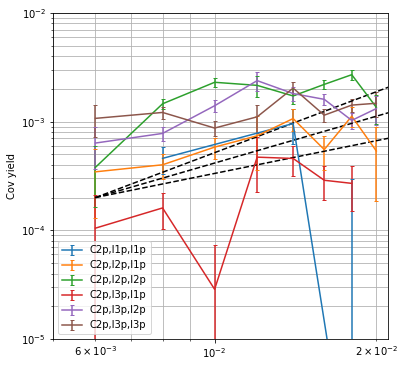

In [101]:
from textwrap import dedent
import os
import pickle
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]
del df, where


step = 0.002
edges = np.arange(0.005, 0.021, step)
xkey, ykey = "ke", "sumke"

plt.figure(figsize=(6, 6))
for _, m in info[info["target"].str.startswith("C2p")].iterrows():
    note = dedent("""\
          target = {target}
            flag {flag}
               p = {p}
          pz(h0) = {h0pz}
        phiy(h1) = {h1phiy}

        Yields are scaled by {scale}\
        """.format_map(m.replace("=", "= ", regex=True)))


    def gen():
        for i, fr in enumerate(edges):
            to = fr + step
            fn = "Data/{}".format(m["data"].format(fr=fr, to=to, **m))
            if not os.path.exists(fn):
                continue

            with open(fn, "rb") as fp:
                yield {"i": i,
                       "d": pickle.load(fp),
                       "fr": fr,
                       "to": to}


    rows = list(gen())
    if len(rows) == 0:
        continue
        
    def gen():
        for r in rows:
            y = r["d"]["Cov[X,Y,Z]"][ykey].sum().values
            yerr = ((r["d"]["Err[Cov[X,Y,Z]]"][ykey] ** 2).sum() ** 0.5).values
            if y < 0:
                continue
            yield {"x": (r["fr"] + r["to"]) / 2,
                   "n": r["d"]["N"],
                   "y": y,
                   "yerr": yerr}


    df = pd.DataFrame(list(gen()))
    plt.ylabel("Cov yield")
    plt.errorbar(
        df["x"],
        m["scale"] * df["y"],
        m["scale"] * df["yerr"],
        fmt="-",
        capsize=2,
        label=m["target"],
    )
plt.legend()

plt.plot([6e-3, 5*6e-3], [2e-4, 5*2e-4], "--k")
plt.plot([6e-3, 5*6e-3], [2e-4, 10*2e-4], "--k")
plt.plot([6e-3, 5*6e-3], [2e-4, 20*2e-4], "--k")
plt.xlim(0.005, 0.021)
plt.ylim(1e-5, 1e-2)
plt.minorticks_on()
plt.grid(True, which="both")
plt.xscale("log")
plt.yscale("log")
plt.show()

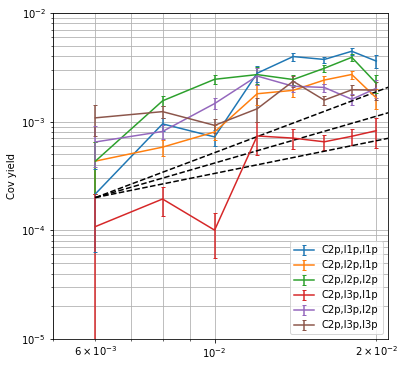

In [106]:
from textwrap import dedent
import os
import pickle
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]
del df, where


step = 0.002
edges = np.arange(0.005, 0.021, step)
xkey, ykey = "ke", "sumke"

plt.figure(figsize=(6, 6))
for _, m in info[info["target"].str.startswith("C2p")].iterrows():
    note = dedent("""\
          target = {target}
            flag {flag}
               p = {p}
          pz(h0) = {h0pz}
        phiy(h1) = {h1phiy}

        Yields are scaled by {scale}\
        """.format_map(m.replace("=", "= ", regex=True)))


    def gen():
        for i, fr in enumerate(edges):
            to = fr + step
            fn = "Data/{}".format(m["data"].format(fr=fr, to=to, **m))
            if not os.path.exists(fn):
                continue

            with open(fn, "rb") as fp:
                yield {"i": i,
                       "d": pickle.load(fp),
                       "fr": fr,
                       "to": to}


    rows = list(gen())
    if len(rows) == 0:
        continue
        
    def gen():
        for r in rows:
            y = r["d"]["Sum[XYZ]"][ykey].sum().values / r["d"]["N"]
            yerr = ((r["d"]["Sum[XYZ]"][ykey]).sum() ** 0.5).values / r["d"]["N"]
            if y < 0:
                continue
            yield {"x": (r["fr"] + r["to"]) / 2,
                   "n": r["d"]["N"],
                   "y": y,
                   "yerr": yerr}


    df = pd.DataFrame(list(gen()))
    plt.ylabel("Cov yield")
    plt.errorbar(
        df["x"],
        m["scale"] * df["y"],
        m["scale"] * df["yerr"],
        fmt="-",
        capsize=2,
        label=m["target"],
    )
plt.legend()

plt.plot([6e-3, 5*6e-3], [2e-4, 5*2e-4], "--k")
plt.plot([6e-3, 5*6e-3], [2e-4, 10*2e-4], "--k")
plt.plot([6e-3, 5*6e-3], [2e-4, 20*2e-4], "--k")
plt.xlim(0.005, 0.021)
plt.ylim(1e-5, 1e-2)
plt.minorticks_on()
plt.grid(True, which="both")
plt.xscale("log")
plt.yscale("log")
plt.show()

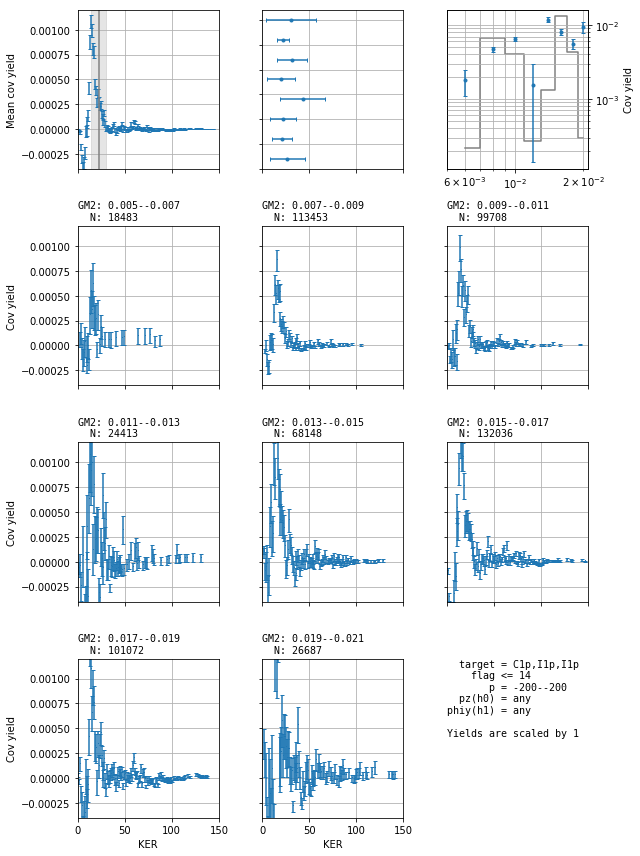

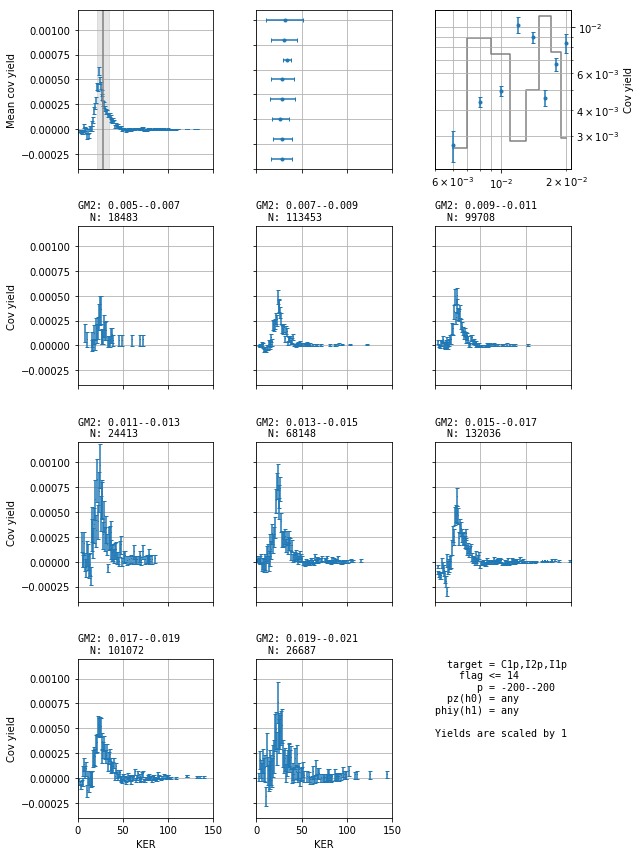

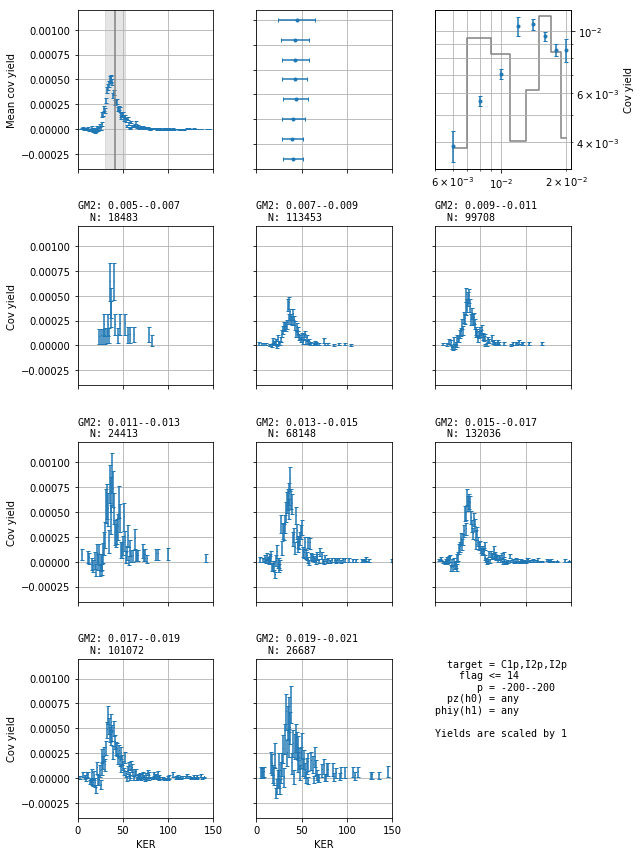

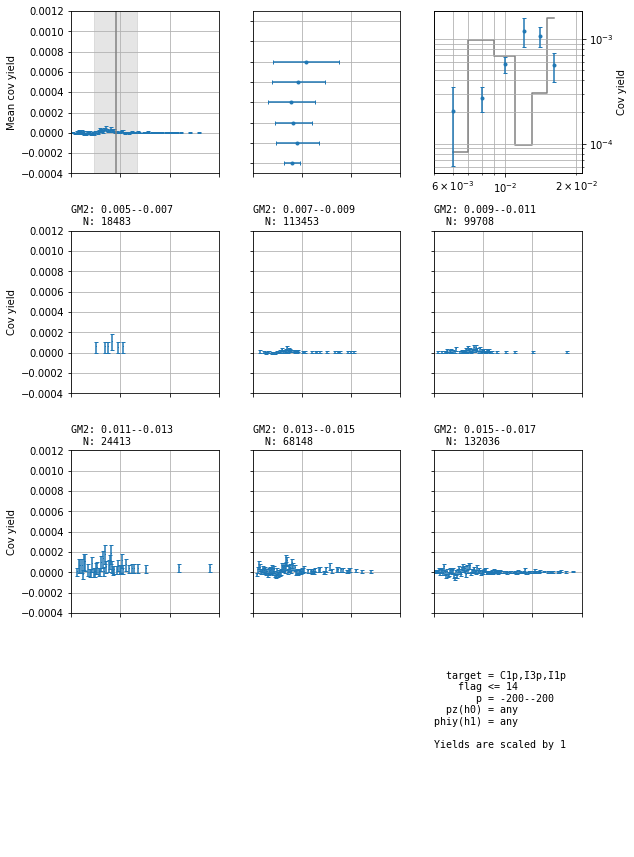

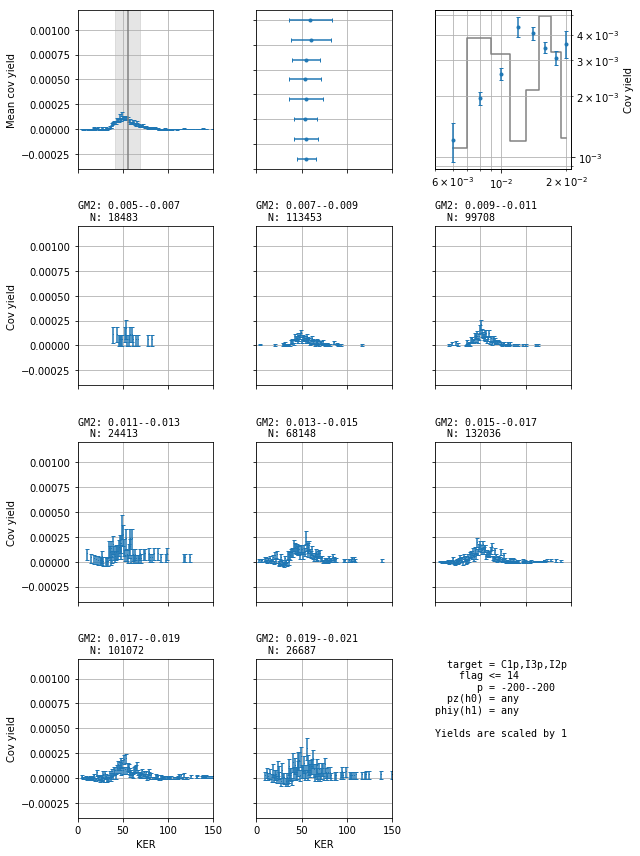

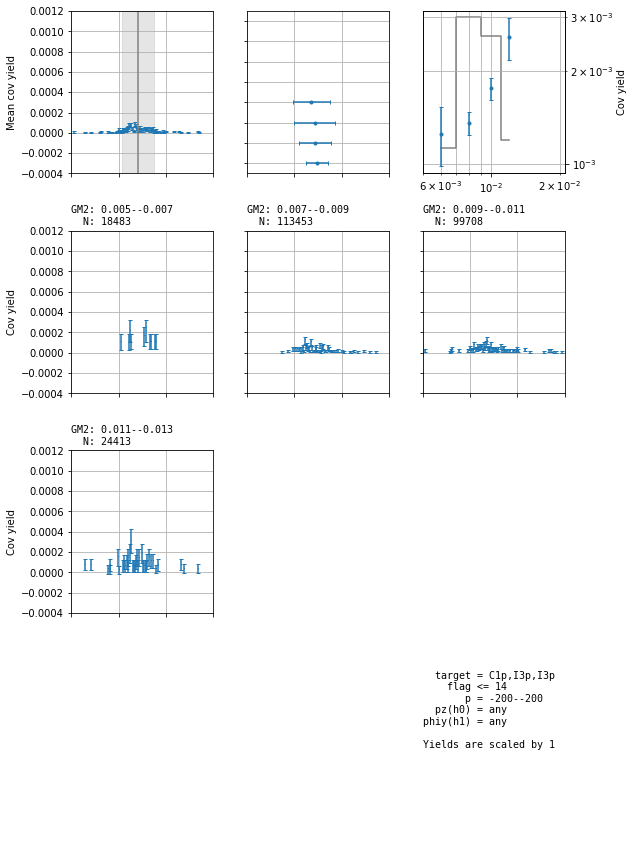

In [93]:
from textwrap import dedent
import os
import pickle
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]
del df, where


step = 0.002
edges = np.arange(0.005, 0.021, step)
xkey, ykey = "ke", "sumke"

for _, m in info[info["target"].str.startswith("C1p")].iterrows():
    note = dedent("""\
          target = {target}
            flag {flag}
               p = {p}
          pz(h0) = {h0pz}
        phiy(h1) = {h1phiy}

        Yields are scaled by {scale}\
        """.format_map(m.replace("=", "= ", regex=True)))


    def gen():
        for i, fr in enumerate(edges):
            to = fr + step
            fn = "Data/{}".format(m["data"].format(fr=fr, to=to, **m))
            if not os.path.exists(fn):
                continue

            with open(fn, "rb") as fp:
                yield {"i": i,
                       "d": pickle.load(fp),
                       "fr": fr,
                       "to": to}


    rows = list(gen())
    if len(rows) == 0:
        continue

    plt.figure(figsize=(9, 12))
    plt.subplot(4, 3, 1)
    plt.xlabel("KER")
    plt.ylabel("Mean cov yield")
    n = sum(r["d"]["N"] for r in rows)
    d = {
        "Cov[X,Y,Z]": sum(r["d"]["N"] * r["d"]["Cov[X,Y,Z]"] for r in rows) / n,
        "Err[Cov[X,Y,Z]]": (sum((r["d"]["N"] * r["d"]["Err[Cov[X,Y,Z]]"]) ** 2
                                for r in rows)
                            ** 0.5 / n),
        "Sum[XYZ]": sum(r["d"]["Sum[XYZ]"] for r in rows),
    }
    dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
    where = 1 < d["Sum[XYZ]"][ykey]
    x = d["Cov[X,Y,Z]"][xkey][where] + dx / 2
    y = d["Cov[X,Y,Z]"][ykey][where]
    yerr = d["Err[Cov[X,Y,Z]]"][ykey][where]
    ave = np.average(x, weights=y)
    std = np.average((x - ave) ** 2, weights=y) ** 0.5
    plt.errorbar(
        x, m["scale"] * y, m["scale"] * yerr,
        fmt=" ",
        capsize=2,
    )
    plt.axvline(ave, color="grey")
    plt.axvspan(ave - std, ave + std, alpha=0.2, color="grey")
    plt.grid(True)
    plt.xlim(0, 150)
    plt.ylim(-0.0004, 0.0012)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            n = r["d"]["N"]
            dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
            where = 0 < r["d"]["Sum[XYZ]"][ykey]
            if where.sum() == 0:
                continue

            ave = np.average(
                r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            )
            std = np.average(
                (r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2 - ave) ** 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            ) ** 0.5
            if not np.isfinite(std):
                continue
            yield {"x": ave, "xerr": std, "y": (r["fr"] + r["to"]) / 2}


    plt.subplot(4, 3, 2)
    plt.xlabel("KER")
    plt.ylabel("GM2")
    df = pd.DataFrame(list(gen()))
    plt.errorbar(
        df["x"],
        df["y"],
        xerr=df["xerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(0, 150)
    plt.ylim(0.005, 0.021)
    plt.grid(True)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            y = r["d"]["Cov[X,Y,Z]"][ykey].sum().values
            yerr = ((r["d"]["Err[Cov[X,Y,Z]]"][ykey] ** 2).sum() ** 0.5).values
            if y < 0:
                continue
            yield {"x": (r["fr"] + r["to"]) / 2,
                   "n": r["d"]["N"],
                   "y": y,
                   "yerr": yerr}


    plt.subplot(4, 3, 3)
    df = pd.DataFrame(list(gen()))
    plt.step(
        df["x"], df["n"],
        where="mid",
        color="gray",
    )
    plt.ylim(0, None)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.yticks([], [])

    plt.twinx()
    plt.ylabel("Cov yield")
    plt.errorbar(
        df["x"],
        m["scale"] * df["y"],
        m["scale"] * df["yerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(0.005, 0.021)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.xscale("log")
    plt.yscale("log")


    for r in rows:
        n = r["d"]["N"]
        dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
        where = r["d"]["Sum[XYZ]"][ykey] != 0

        plt.subplot(4, 3, r["i"] + 4)
        plt.title(f"GM2: {r['fr']:.3f}--{r['to']:.3f}\n"
                f"  N: {n}",
                fontdict={"family": "monospace", "size": "medium"},
                loc="left")
        plt.xlabel("KER")
        plt.ylabel("Cov yield")
        plt.errorbar(
            r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
            m["scale"] * r["d"]["Cov[X,Y,Z]"][ykey][where],
            m["scale"] * r["d"]["Err[Cov[X,Y,Z]]"][ykey][where],
            fmt=",",
            capsize=2,
        )
        plt.grid(True)
        plt.xlim(0, 150)
        plt.ylim(-0.0004, 0.0012)
        plt.gca().label_outer()
    plt.subplot(4, 3, 12)
    plt.text(0, 1, note,
            fontdict={"family": "monospace"},
            verticalalignment="top")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("Figures/Cov KER; target={target}.png".format_map(m))
    plt.show()

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in double_scalars


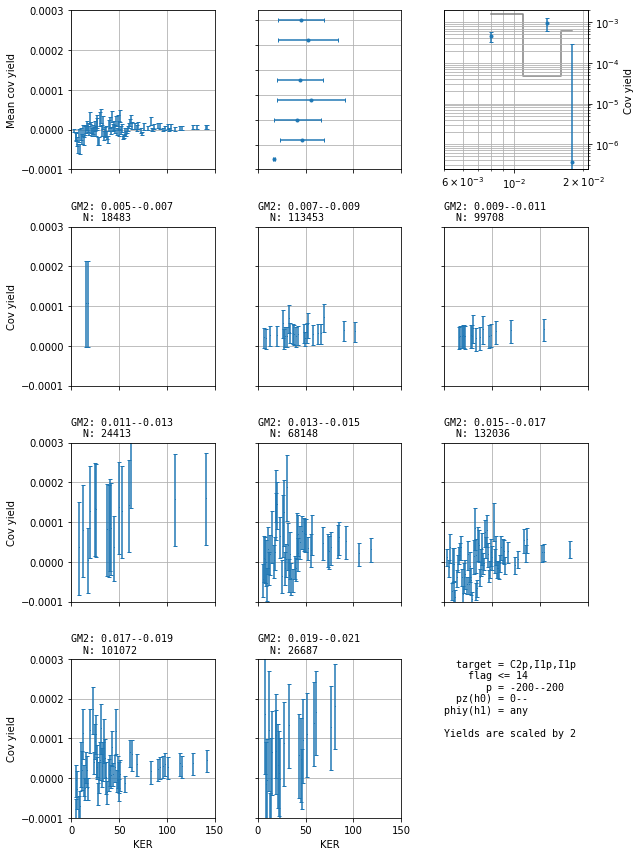

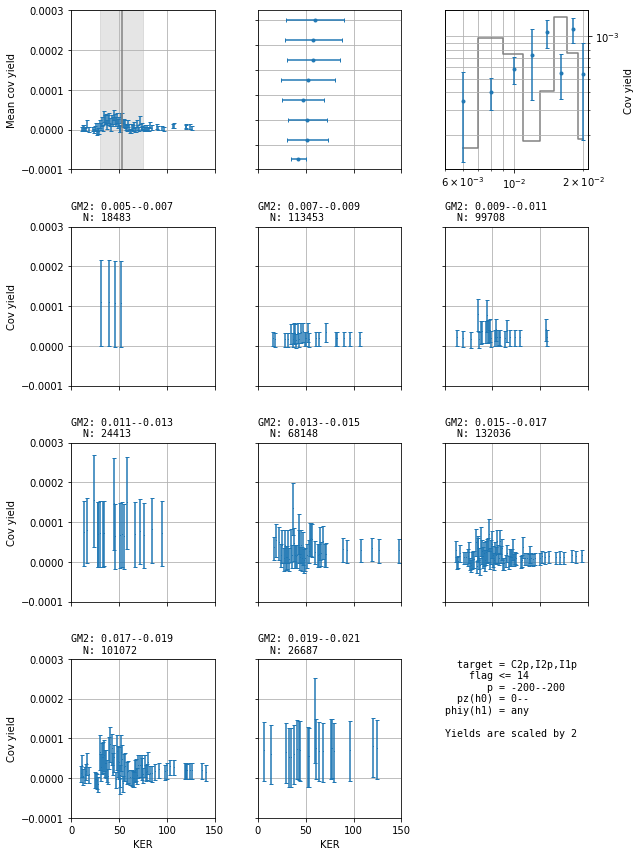

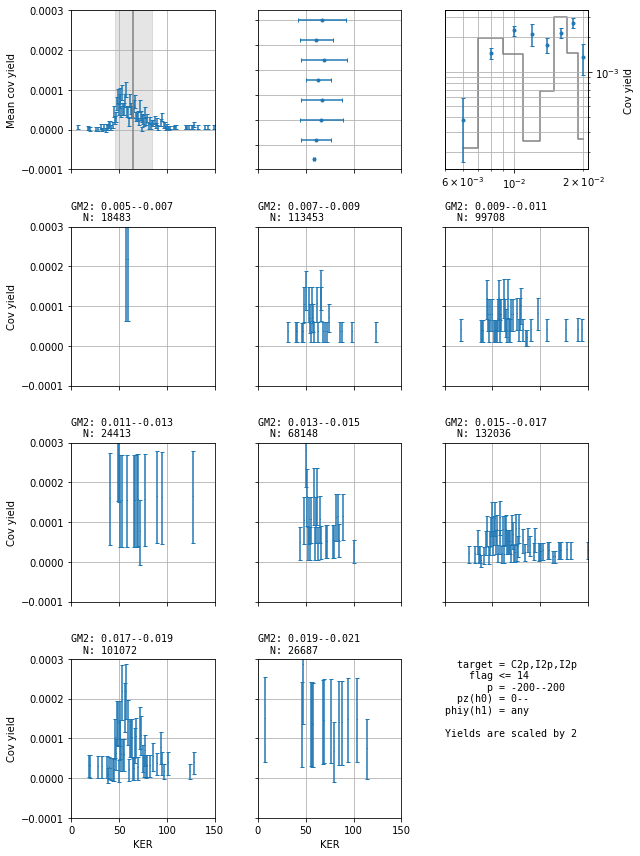

In [94]:
from textwrap import dedent
import os
import pickle
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]
del df, where


step = 0.002
edges = np.arange(0.005, 0.021, step)
xkey, ykey = "ke", "sumke"

for _, m in info[info["target"].str.startswith("C2p")].iterrows():
    note = dedent("""\
          target = {target}
            flag {flag}
               p = {p}
          pz(h0) = {h0pz}
        phiy(h1) = {h1phiy}

        Yields are scaled by {scale}\
        """.format_map(m.replace("=", "= ", regex=True)))


    def gen():
        for i, fr in enumerate(edges):
            to = fr + step
            fn = "Data/{}".format(m["data"].format(fr=fr, to=to, **m))
            if not os.path.exists(fn):
                continue

            with open(fn, "rb") as fp:
                yield {"i": i,
                       "d": pickle.load(fp),
                       "fr": fr,
                       "to": to}


    rows = list(gen())
    if len(rows) == 0:
        continue

    plt.figure(figsize=(9, 12))
    plt.subplot(4, 3, 1)
    plt.xlabel("KER")
    plt.ylabel("Mean cov yield")
    n = sum(r["d"]["N"] for r in rows)
    d = {
        "Cov[X,Y,Z]": sum(r["d"]["N"] * r["d"]["Cov[X,Y,Z]"] for r in rows) / n,
        "Err[Cov[X,Y,Z]]": (sum((r["d"]["N"] * r["d"]["Err[Cov[X,Y,Z]]"]) ** 2
                                for r in rows)
                            ** 0.5 / n),
        "Sum[XYZ]": sum(r["d"]["Sum[XYZ]"] for r in rows),
    }
    dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
    where = 1 < d["Sum[XYZ]"][ykey]
    x = d["Cov[X,Y,Z]"][xkey][where] + dx / 2
    y = d["Cov[X,Y,Z]"][ykey][where]
    yerr = d["Err[Cov[X,Y,Z]]"][ykey][where]
    ave = np.average(x, weights=y)
    std = np.average((x - ave) ** 2, weights=y) ** 0.5
    plt.errorbar(
        x, m["scale"] * y, m["scale"] * yerr,
        fmt=" ",
        capsize=2,
    )
    plt.axvline(ave, color="grey")
    plt.axvspan(ave - std, ave + std, alpha=0.2, color="grey")
    plt.grid(True)
    plt.xlim(0, 150)
    plt.ylim(-0.0001, 0.0003)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            n = r["d"]["N"]
            dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
            where = 0 < r["d"]["Sum[XYZ]"][ykey]
            if where.sum() == 0:
                continue

            ave = np.average(
                r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            )
            std = np.average(
                (r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2 - ave) ** 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            ) ** 0.5
            if not np.isfinite(std):
                continue
            yield {"x": ave, "xerr": std, "y": (r["fr"] + r["to"]) / 2}


    plt.subplot(4, 3, 2)
    plt.xlabel("KER")
    plt.ylabel("GM2")
    df = pd.DataFrame(list(gen()))
    plt.errorbar(
        df["x"],
        df["y"],
        xerr=df["xerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(0, 150)
    plt.ylim(0.005, 0.021)
    plt.grid(True)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            y = r["d"]["Cov[X,Y,Z]"][ykey].sum().values
            yerr = ((r["d"]["Err[Cov[X,Y,Z]]"][ykey] ** 2).sum() ** 0.5).values
            if y < 0:
                continue
            yield {"x": (r["fr"] + r["to"]) / 2,
                   "n": r["d"]["N"],
                   "y": y,
                   "yerr": yerr}


    plt.subplot(4, 3, 3)
    df = pd.DataFrame(list(gen()))
    plt.step(
        df["x"], df["n"],
        where="mid",
        color="gray",
    )
    plt.ylim(0, None)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.yticks([], [])

    plt.twinx()
    plt.ylabel("Cov yield")
    plt.errorbar(
        df["x"],
        m["scale"] * df["y"],
        m["scale"] * df["yerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(0.005, 0.021)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.xscale("log")
    plt.yscale("log")


    for r in rows:
        n = r["d"]["N"]
        dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
        where = r["d"]["Sum[XYZ]"][ykey] != 0

        plt.subplot(4, 3, r["i"] + 4)
        plt.title(f"GM2: {r['fr']:.3f}--{r['to']:.3f}\n"
                f"  N: {n}",
                fontdict={"family": "monospace", "size": "medium"},
                loc="left")
        plt.xlabel("KER")
        plt.ylabel("Cov yield")
        plt.errorbar(
            r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
            m["scale"] * r["d"]["Cov[X,Y,Z]"][ykey][where],
            m["scale"] * r["d"]["Err[Cov[X,Y,Z]]"][ykey][where],
            fmt=",",
            capsize=2,
        )
        plt.grid(True)
        plt.xlim(0, 150)
        plt.ylim(-0.0001, 0.0003)
        plt.gca().label_outer()
    plt.subplot(4, 3, 12)
    plt.text(0, 1, note,
            fontdict={"family": "monospace"},
            verticalalignment="top")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("Figures/Cov KER; target={target}.png".format_map(m))
    plt.show()

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in double_scalars


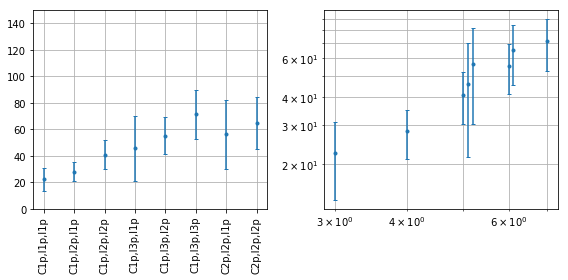

In [66]:
from textwrap import dedent
import os
import pickle
import typing
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]
del df, where


step = 0.002
edges = np.arange(0.005, 0.021, step)
xkey, ykey = "ke", "sumke"

def gen():
    pool = set()
    for _, m in info.iterrows():
        note = dedent("""\
            target = {target}
                flag {flag}
                p = {p}
            pz(h0) = {h0pz}
            phiy(h1) = {h1phiy}

            Yields are scaled by {scale}\
            """.format_map(m.replace("=", "= ", regex=True)))


        def _rows():
            for i, fr in enumerate(edges):
                to = fr + step
                fn = "Data/{}".format(m["data"].format(fr=fr, to=to, **m))
                if not os.path.exists(fn):
                    continue

                with open(fn, "rb") as fp:
                    yield {"i": i,
                        "d": pickle.load(fp),
                        "fr": fr,
                        "to": to}


        rows = list(_rows())
        if len(rows) == 0:
            continue

        n = sum(r["d"]["N"] for r in rows)
        d = {
            "Cov[X,Y,Z]": sum(r["d"]["N"] * r["d"]["Cov[X,Y,Z]"] for r in rows) / n,
            "Err[Cov[X,Y,Z]]": (sum((r["d"]["N"] * r["d"]["Err[Cov[X,Y,Z]]"]) ** 2
                                    for r in rows)
                                ** 0.5 / n),
            "Sum[XYZ]": sum(r["d"]["Sum[XYZ]"] for r in rows),
        }
        dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
        where = 0 < d["Sum[XYZ]"][ykey]

        ave = np.average(
            d["Cov[X,Y,Z]"][xkey][where] + dx / 2,
            weights=d["Cov[X,Y,Z]"][ykey][where],
        )
        std = np.average(
            (d["Cov[X,Y,Z]"][xkey][where] + dx / 2 - ave) ** 2,
            weights=d["Cov[X,Y,Z]"][ykey][where],
        ) ** 0.5
        if not np.isfinite(std):
            continue
        found = re.search("C([1-9])p,I([1-9])p,I([1-9])p", m["target"])
        x = sum(int(s) for s in found.groups())
        while(True):
            if x not in pool:
                pool.add(x)
                break
            x += 0.1
        yield {"name": m["target"],
               "x": x,
               "y": ave,
               "yerr": std}


df = pd.DataFrame(list(gen()))


plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.errorbar(
    df["name"],
    df["y"],
    df["yerr"],
    fmt=".",
    capsize=2,
)
plt.ylim(0, 150)
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(122)
plt.errorbar(
    df["x"],
    df["y"],
    df["yerr"],
    fmt=".",
    capsize=2,
)
plt.xscale("log")
plt.yscale("log")
plt.minorticks_on()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


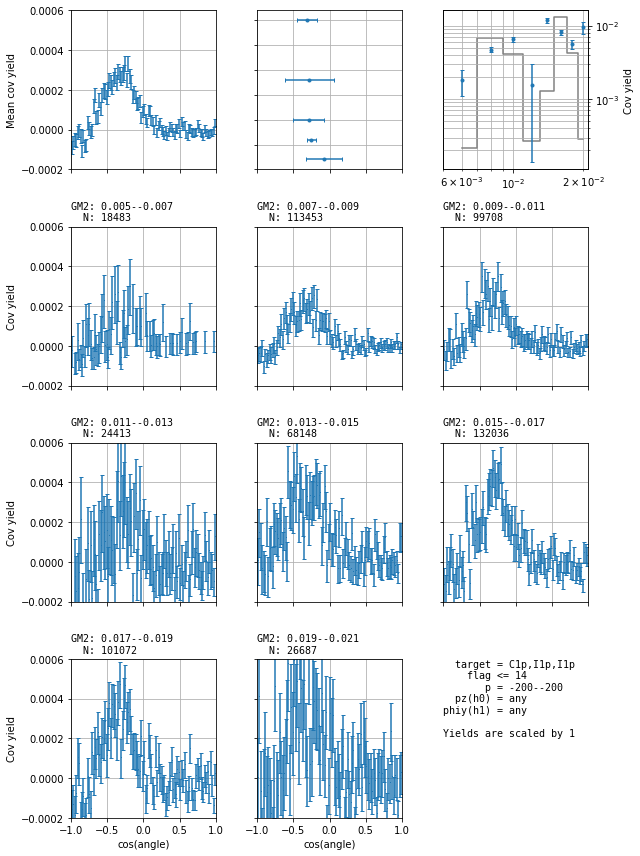

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


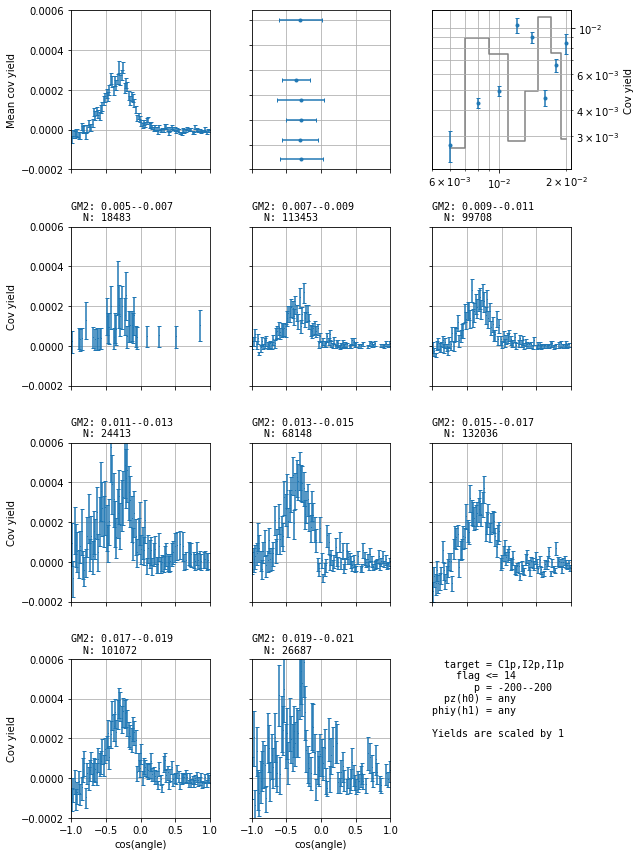

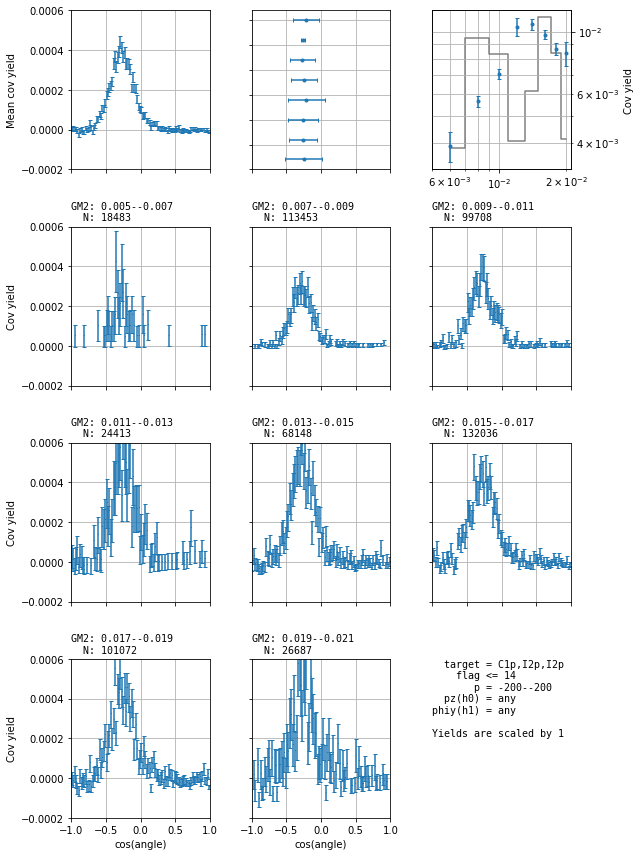

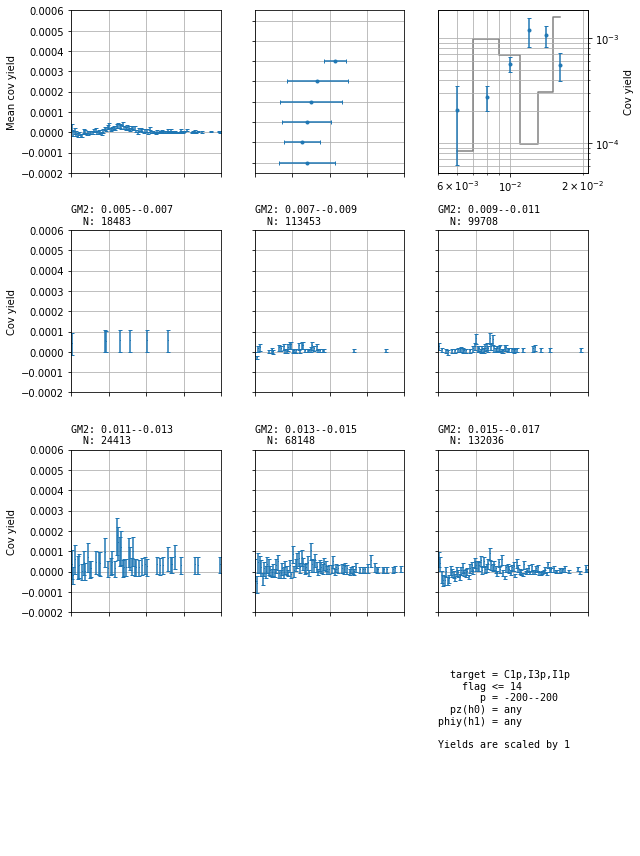

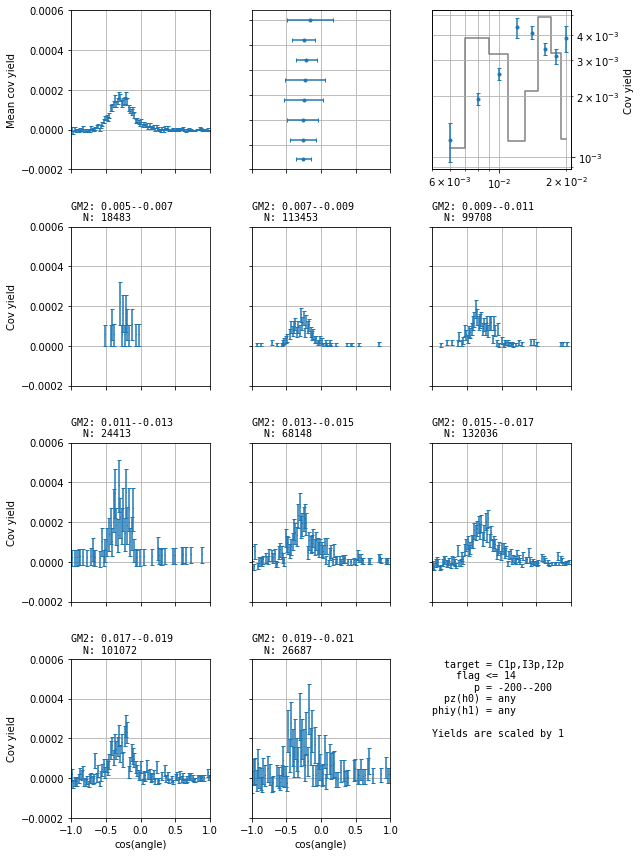

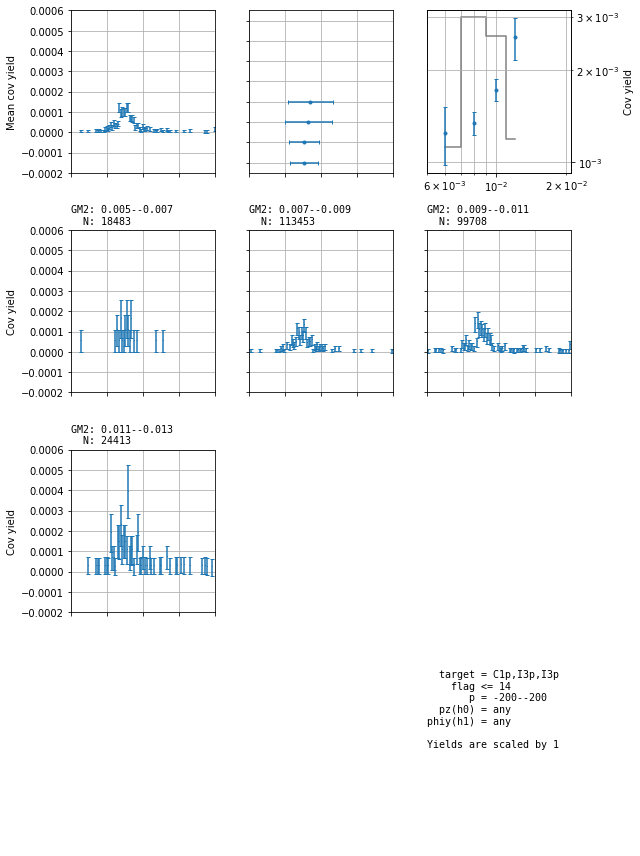

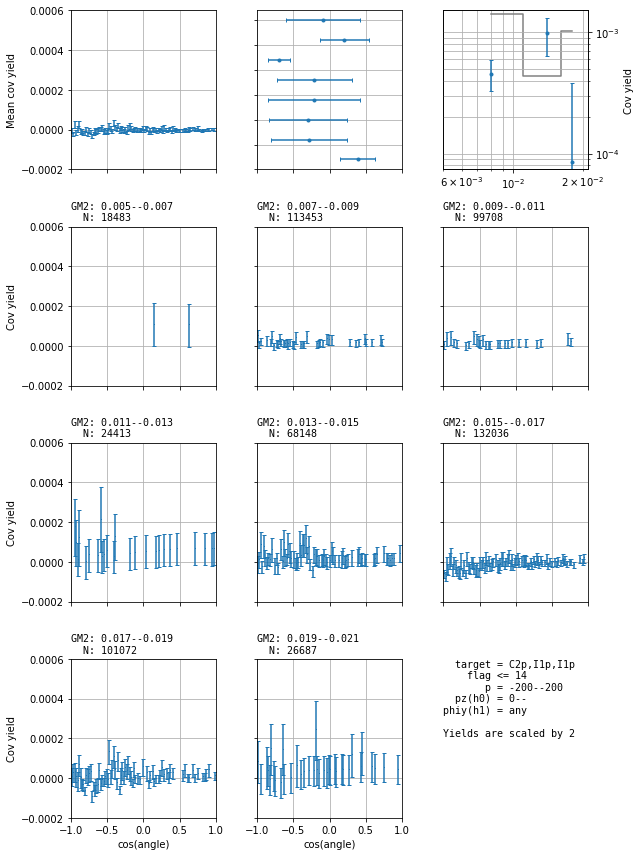

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


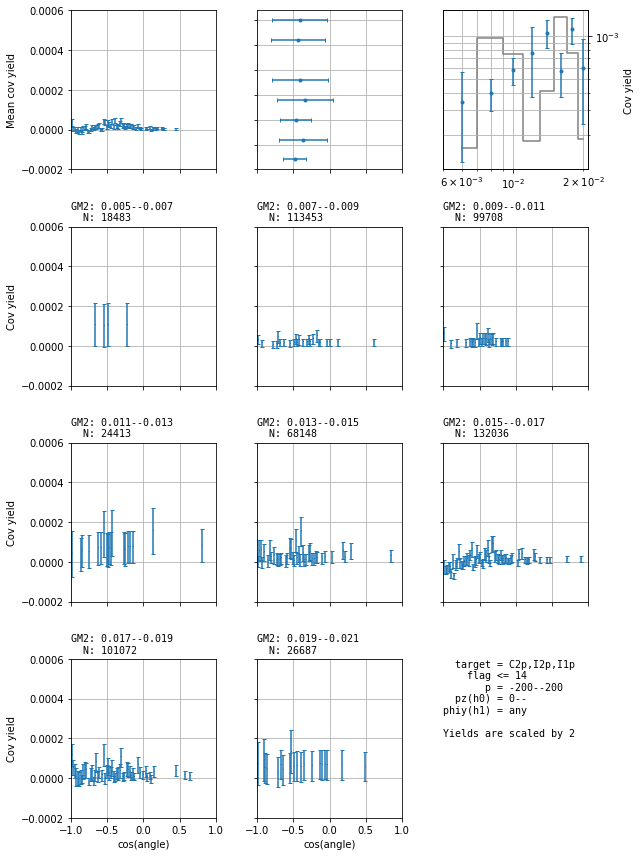

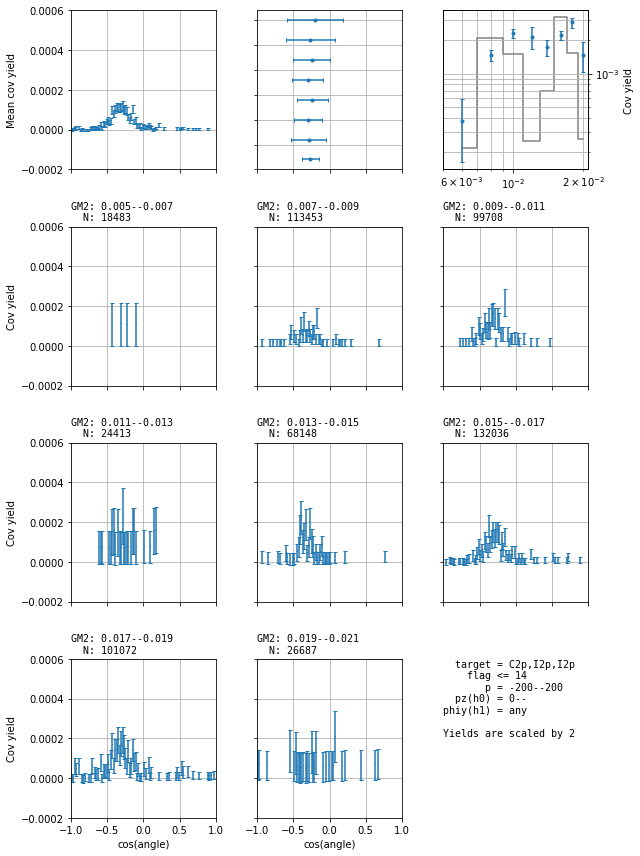

In [30]:
from textwrap import dedent
import os
import pickle
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]
del df, where


step = 0.002
edges = np.arange(0.005, 0.021, step)
xkey, ykey = "cosang", "h0h1angle"

for _, m in info.iterrows():
    note = dedent("""\
          target = {target}
            flag {flag}
               p = {p}
          pz(h0) = {h0pz}
        phiy(h1) = {h1phiy}

        Yields are scaled by {scale}\
        """.format_map(m.replace("=", "= ", regex=True)))


    def gen():
        for i, fr in enumerate(edges):
            to = fr + step
            fn = "Data/{}".format(m["data"].format(fr=fr, to=to, **m))
            if not os.path.exists(fn):
                continue

            with open(fn, "rb") as fp:
                yield {"i": i,
                       "d": pickle.load(fp),
                       "fr": fr,
                       "to": to}


    rows = list(gen())
    if len(rows) == 0:
        continue

    plt.figure(figsize=(9, 12))
    plt.subplot(4, 3, 1)
    plt.xlabel("cos(angle)")
    plt.ylabel("Mean cov yield")
    n = sum(r["d"]["N"] for r in rows)
    d = {
        "Cov[X,Y,Z]": sum(r["d"]["N"] * r["d"]["Cov[X,Y,Z]"] for r in rows) / n,
        "Err[Cov[X,Y,Z]]": (sum((r["d"]["N"] * r["d"]["Err[Cov[X,Y,Z]]"]) ** 2
                                for r in rows)
                            ** 0.5 / n),
        "Sum[XYZ]": sum(r["d"]["Sum[XYZ]"] for r in rows),
    }
    dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
    where = 1 < d["Sum[XYZ]"][ykey]
    plt.errorbar(
        d["Cov[X,Y,Z]"][xkey][where] + dx / 2,
        m["scale"] * d["Cov[X,Y,Z]"][ykey][where],
        m["scale"] * d["Err[Cov[X,Y,Z]]"][ykey][where],
        fmt=" ",
        capsize=2,
    )
    plt.grid(True)
    plt.xlim(-1, 1)
    plt.ylim(-0.0002, 0.0006)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            n = r["d"]["N"]
            dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
            where = 0 < r["d"]["Sum[XYZ]"][ykey]
            if where.sum() == 0:
                continue

            ave = np.average(
                r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            )
            std = np.average(
                (r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2 - ave) ** 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            ) ** 0.5
            if not np.isfinite(std):
                continue
            yield {"x": ave, "xerr": std, "y": (r["fr"] + r["to"]) / 2}


    plt.subplot(4, 3, 2)
    plt.xlabel("cos(angle)")
    plt.ylabel("GM2")
    df = pd.DataFrame(list(gen()))
    plt.errorbar(
        df["x"], df["y"],
        xerr=df["xerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(-1, 1)
    plt.ylim(0.005, 0.021)
    plt.grid(True)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            y = r["d"]["Cov[X,Y,Z]"][ykey].sum().values
            yerr = ((r["d"]["Err[Cov[X,Y,Z]]"][ykey] ** 2).sum() ** 0.5).values
            if y < 0:
                continue
            yield {"x": (r["fr"] + r["to"]) / 2,
                   "n": r["d"]["N"],
                   "y": y,
                   "yerr": yerr}


    plt.subplot(4, 3, 3)
    df = pd.DataFrame(list(gen()))
    plt.step(
        df["x"], df["n"],
        where="mid",
        color="gray",
    )
    plt.ylim(0, None)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.yticks([], [])

    plt.twinx()
    plt.ylabel("Cov yield")
    plt.errorbar(
        df["x"],
        m["scale"] * df["y"],
        m["scale"] * df["yerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(0.005, 0.021)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.xscale("log")
    plt.yscale("log")


    for r in rows:
        n = r["d"]["N"]
        dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
        where = r["d"]["Sum[XYZ]"][ykey] != 0

        plt.subplot(4, 3, r["i"] + 4)
        plt.title(f"GM2: {r['fr']:.3f}--{r['to']:.3f}\n"
                f"  N: {n}",
                fontdict={"family": "monospace", "size": "medium"},
                loc="left")
        plt.xlabel("cos(angle)")
        plt.ylabel("Cov yield")
        plt.errorbar(
            r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
            m["scale"] * r["d"]["Cov[X,Y,Z]"][ykey][where],
            m["scale"] * r["d"]["Err[Cov[X,Y,Z]]"][ykey][where],
            fmt=",",
            capsize=2,
        )
        plt.grid(True)
        plt.xlim(-1, 1)
        plt.ylim(-0.0002, 0.0006)
        plt.gca().label_outer()
    plt.subplot(4, 3, 12)
    plt.text(0, 1, note,
            fontdict={"family": "monospace"},
            verticalalignment="top")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("Figures/Cov ang dist h0-h1; target={target}.png".format_map(m))
    plt.show()

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


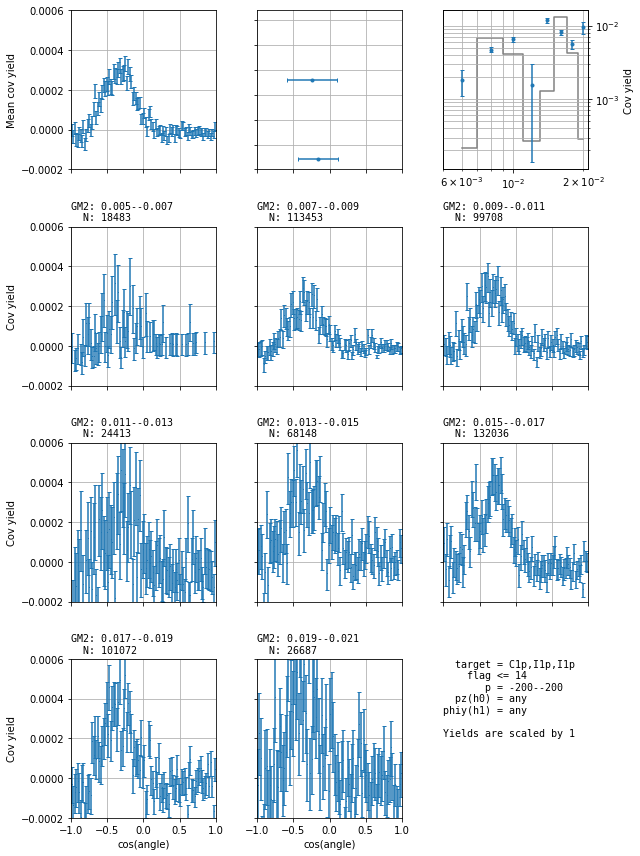

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


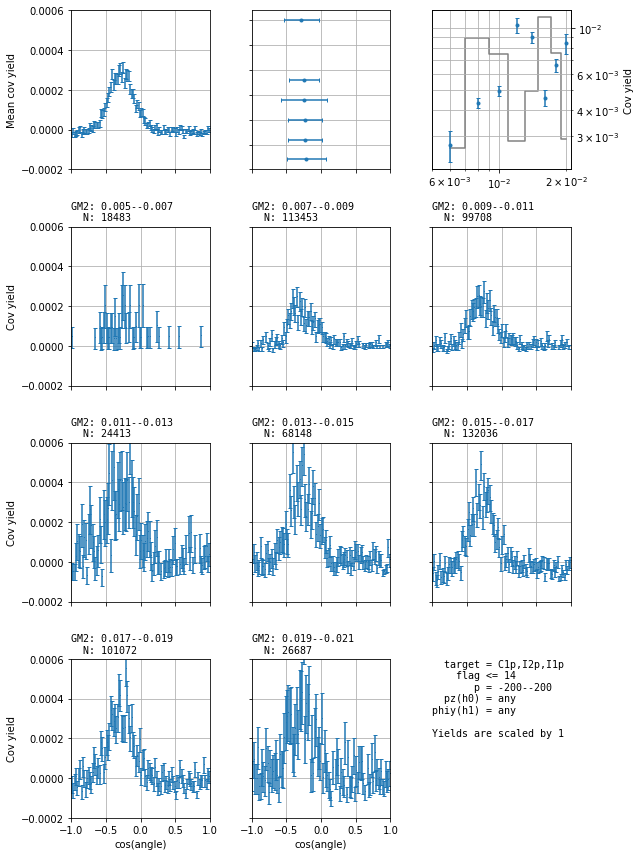

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


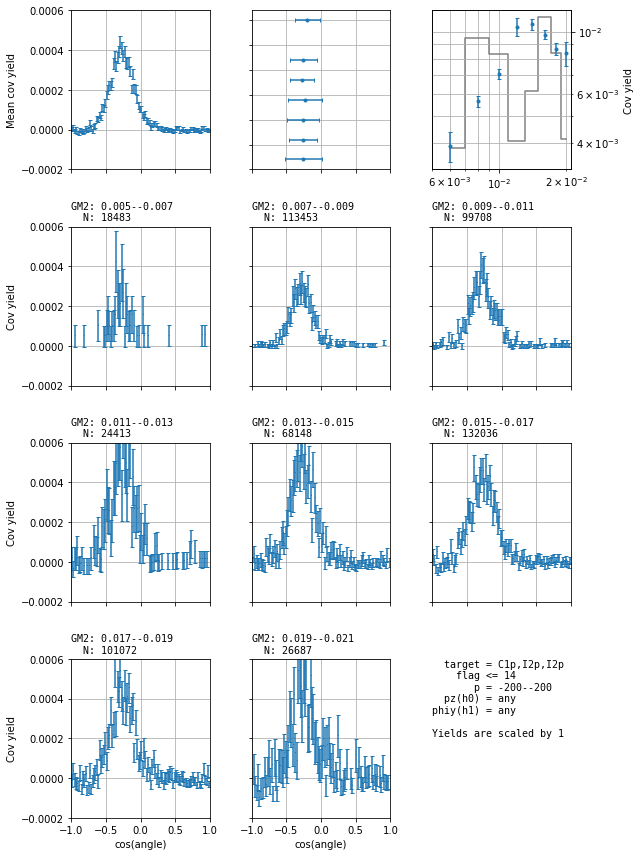

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


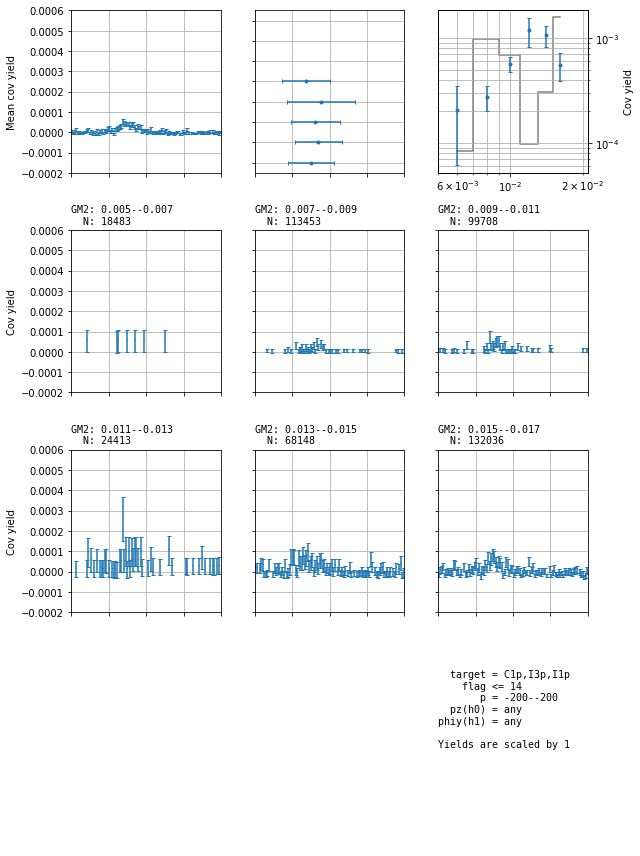

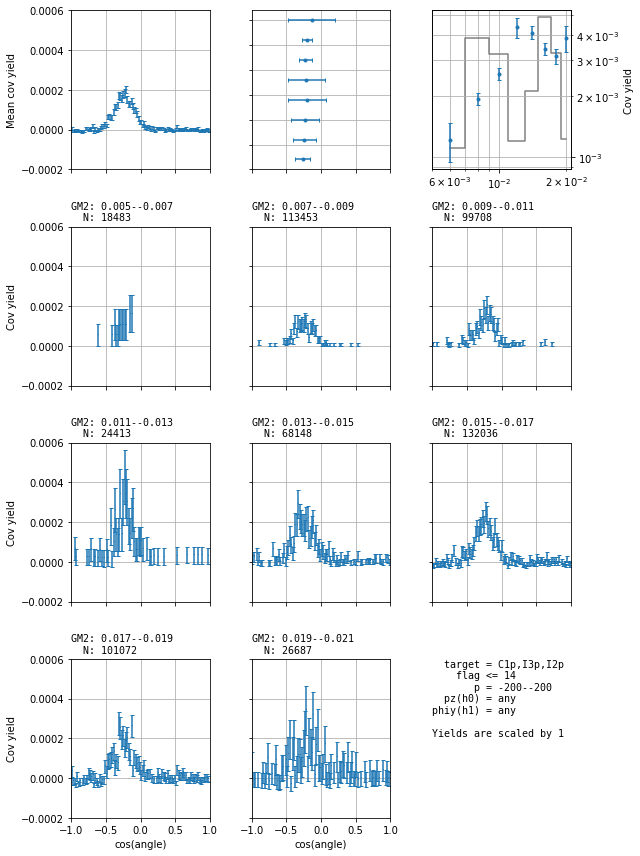

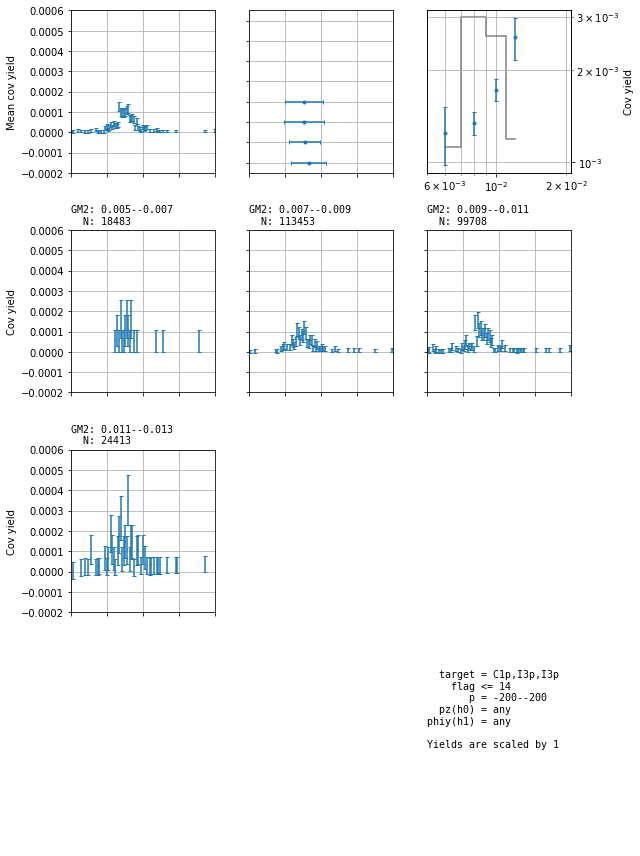

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


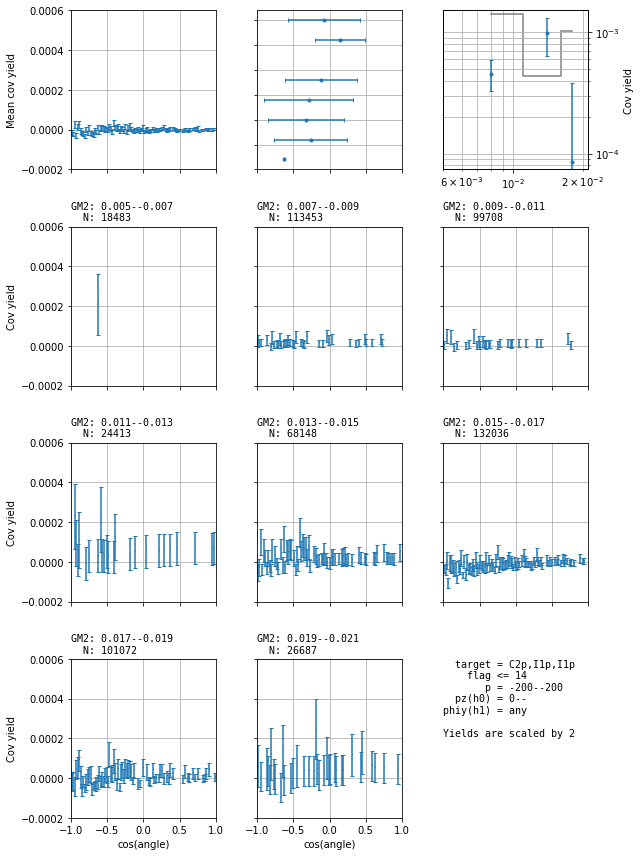

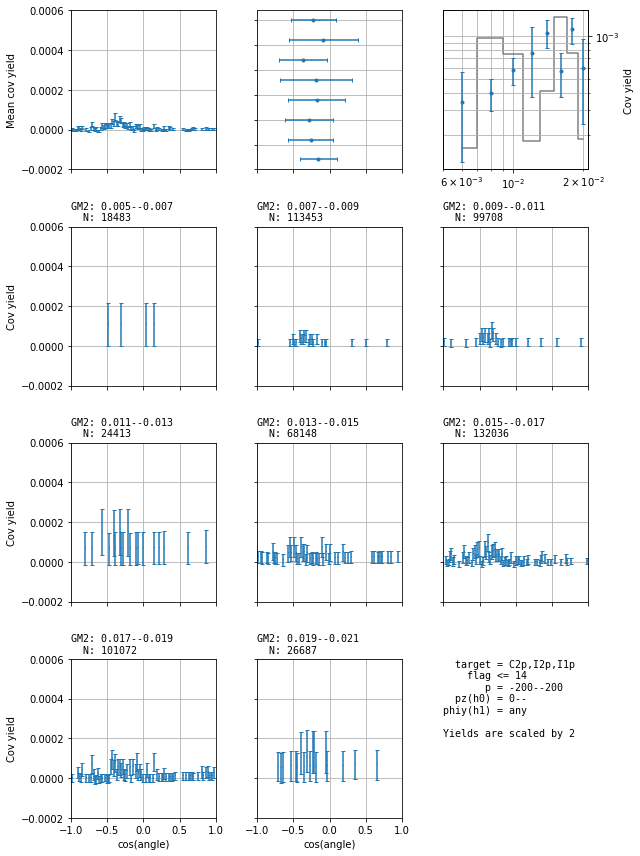

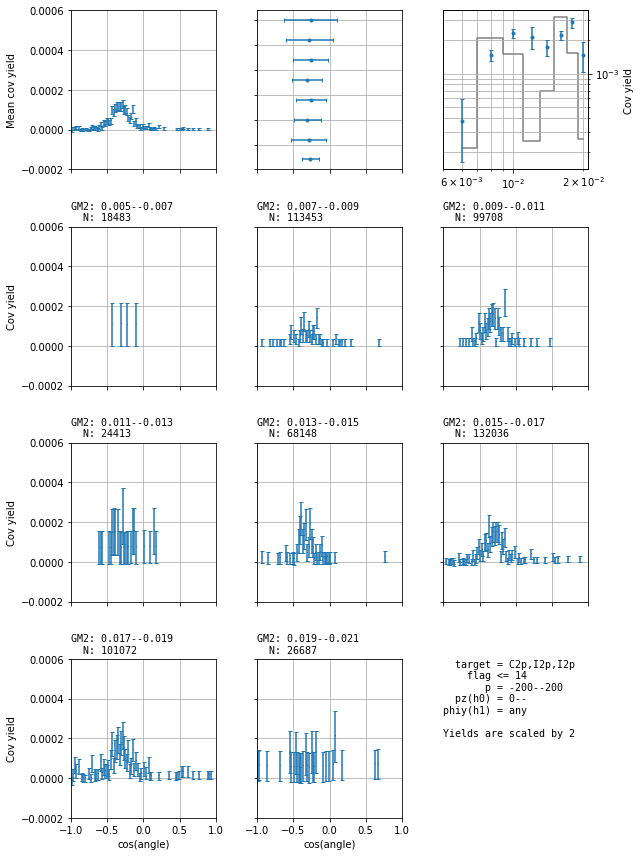

In [31]:
from textwrap import dedent
import os
import pickle
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]
del df, where


step = 0.002
edges = np.arange(0.005, 0.021, step)
xkey, ykey = "cosang", "h0h2angle"

for _, m in info.iterrows():
    note = dedent("""\
          target = {target}
            flag {flag}
               p = {p}
          pz(h0) = {h0pz}
        phiy(h1) = {h1phiy}

        Yields are scaled by {scale}\
        """.format_map(m.replace("=", "= ", regex=True)))


    def gen():
        for i, fr in enumerate(edges):
            to = fr + step
            fn = "Data/{}".format(m["data"].format(fr=fr, to=to, **m))
            if not os.path.exists(fn):
                continue

            with open(fn, "rb") as fp:
                yield {"i": i,
                       "d": pickle.load(fp),
                       "fr": fr,
                       "to": to}


    rows = list(gen())
    if len(rows) == 0:
        continue

    plt.figure(figsize=(9, 12))
    plt.subplot(4, 3, 1)
    plt.xlabel("cos(angle)")
    plt.ylabel("Mean cov yield")
    n = sum(r["d"]["N"] for r in rows)
    d = {
        "Cov[X,Y,Z]": sum(r["d"]["N"] * r["d"]["Cov[X,Y,Z]"] for r in rows) / n,
        "Err[Cov[X,Y,Z]]": (sum((r["d"]["N"] * r["d"]["Err[Cov[X,Y,Z]]"]) ** 2
                                for r in rows)
                            ** 0.5 / n),
        "Sum[XYZ]": sum(r["d"]["Sum[XYZ]"] for r in rows),
    }
    dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
    where = 1 < d["Sum[XYZ]"][ykey]
    plt.errorbar(
        d["Cov[X,Y,Z]"][xkey][where] + dx / 2,
        m["scale"] * d["Cov[X,Y,Z]"][ykey][where],
        m["scale"] * d["Err[Cov[X,Y,Z]]"][ykey][where],
        fmt=" ",
        capsize=2,
    )
    plt.grid(True)
    plt.xlim(-1, 1)
    plt.ylim(-0.0002, 0.0006)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            n = r["d"]["N"]
            dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
            where = 0 < r["d"]["Sum[XYZ]"][ykey]
            if where.sum() == 0:
                continue

            ave = np.average(
                r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            )
            std = np.average(
                (r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2 - ave) ** 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            ) ** 0.5
            if not np.isfinite(std):
                continue
            yield {"x": ave, "xerr": std, "y": (r["fr"] + r["to"]) / 2}


    plt.subplot(4, 3, 2)
    plt.xlabel("cos(angle)")
    plt.ylabel("GM2")
    df = pd.DataFrame(list(gen()))
    plt.errorbar(
        df["x"], df["y"],
        xerr=df["xerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(-1, 1)
    plt.ylim(0.005, 0.021)
    plt.grid(True)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            y = r["d"]["Cov[X,Y,Z]"][ykey].sum().values
            yerr = ((r["d"]["Err[Cov[X,Y,Z]]"][ykey] ** 2).sum() ** 0.5).values
            if y < 0:
                continue
            yield {"x": (r["fr"] + r["to"]) / 2,
                   "n": r["d"]["N"],
                   "y": y,
                   "yerr": yerr}


    plt.subplot(4, 3, 3)
    df = pd.DataFrame(list(gen()))
    plt.step(
        df["x"], df["n"],
        where="mid",
        color="gray",
    )
    plt.ylim(0, None)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.yticks([], [])

    plt.twinx()
    plt.ylabel("Cov yield")
    plt.errorbar(
        df["x"],
        m["scale"] * df["y"],
        m["scale"] * df["yerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(0.005, 0.021)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.xscale("log")
    plt.yscale("log")


    for r in rows:
        n = r["d"]["N"]
        dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
        where = r["d"]["Sum[XYZ]"][ykey] != 0

        plt.subplot(4, 3, r["i"] + 4)
        plt.title(f"GM2: {r['fr']:.3f}--{r['to']:.3f}\n"
                f"  N: {n}",
                fontdict={"family": "monospace", "size": "medium"},
                loc="left")
        plt.xlabel("cos(angle)")
        plt.ylabel("Cov yield")
        plt.errorbar(
            r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
            m["scale"] * r["d"]["Cov[X,Y,Z]"][ykey][where],
            m["scale"] * r["d"]["Err[Cov[X,Y,Z]]"][ykey][where],
            fmt=",",
            capsize=2,
        )
        plt.grid(True)
        plt.xlim(-1, 1)
        plt.ylim(-0.0002, 0.0006)
        plt.gca().label_outer()
    plt.subplot(4, 3, 12)
    plt.text(0, 1, note,
            fontdict={"family": "monospace"},
            verticalalignment="top")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("Figures/Cov ang dist h0-h2; target={target}.png".format_map(m))
    plt.show()

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


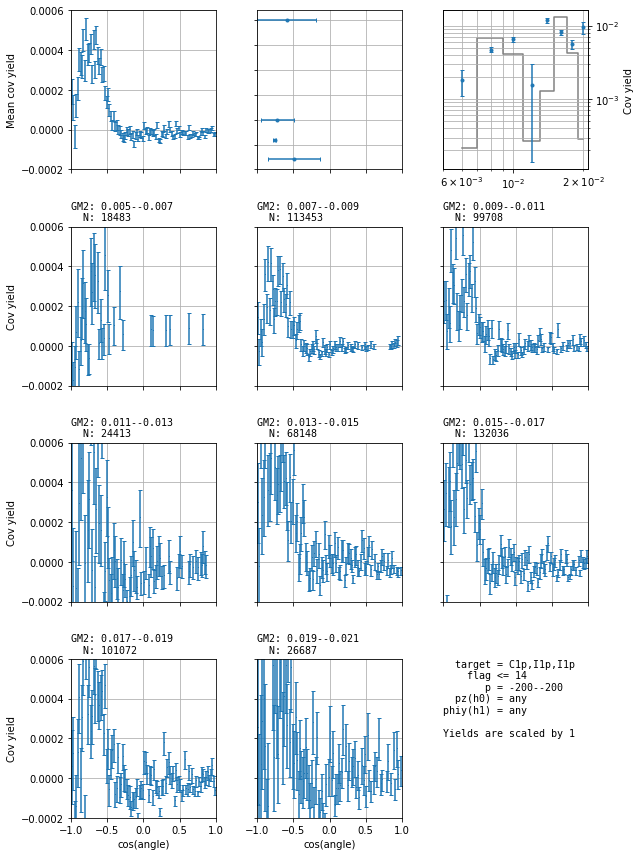

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


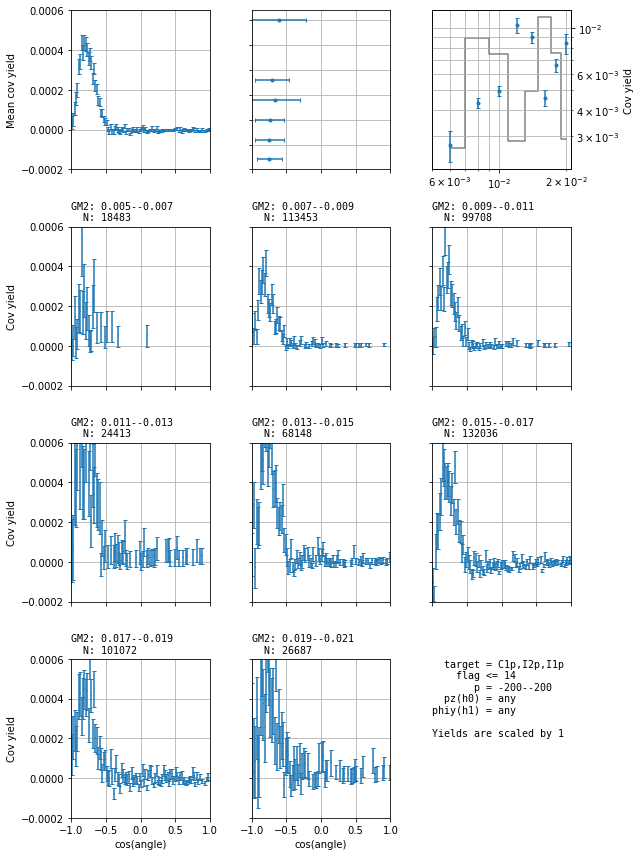

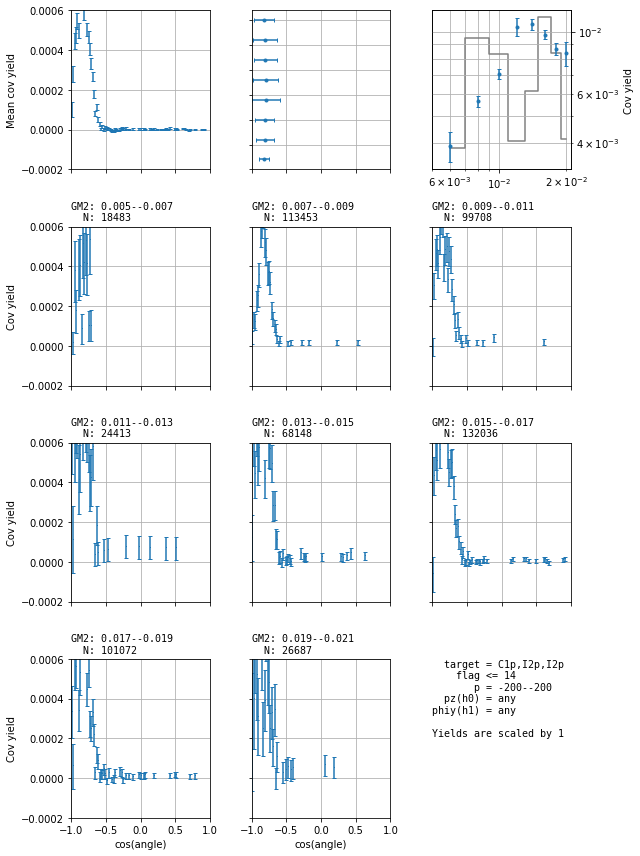

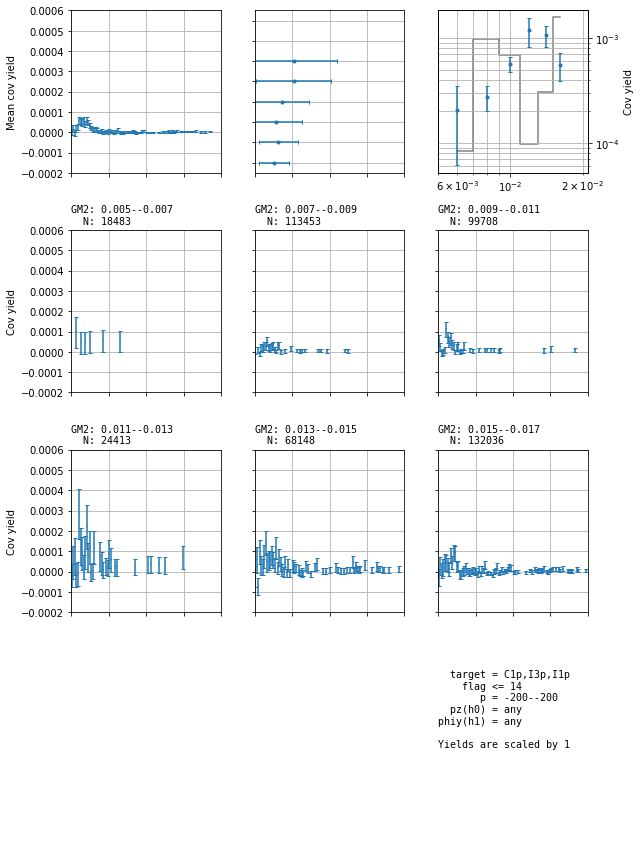

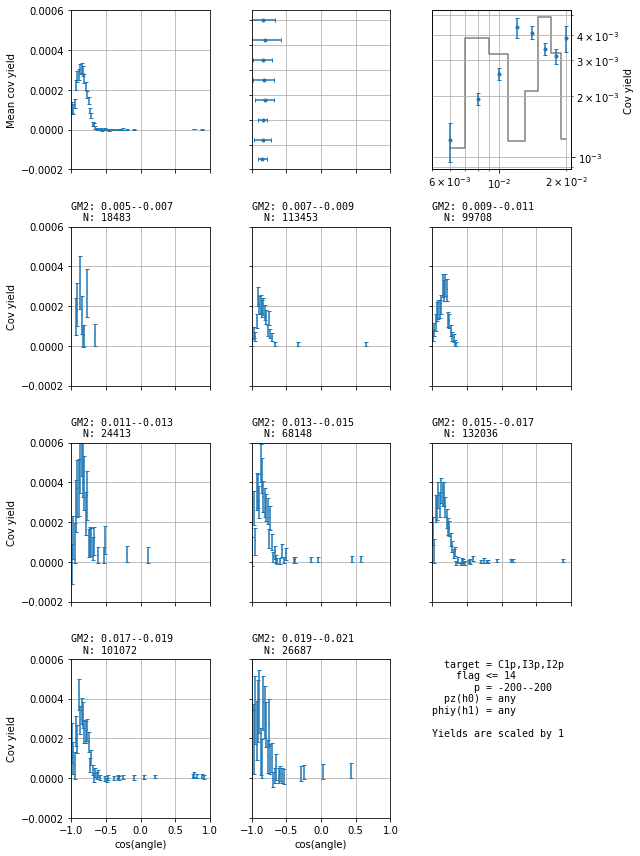

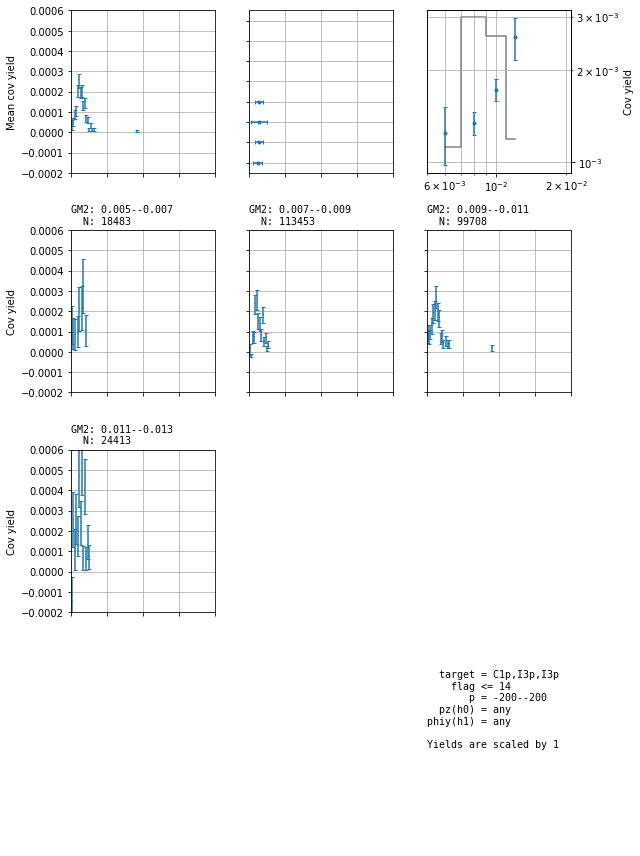

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


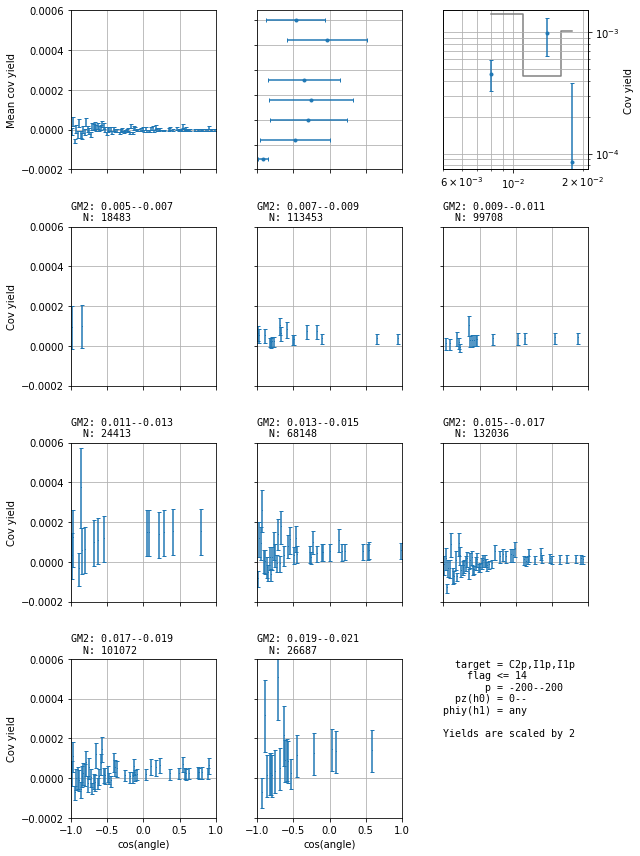

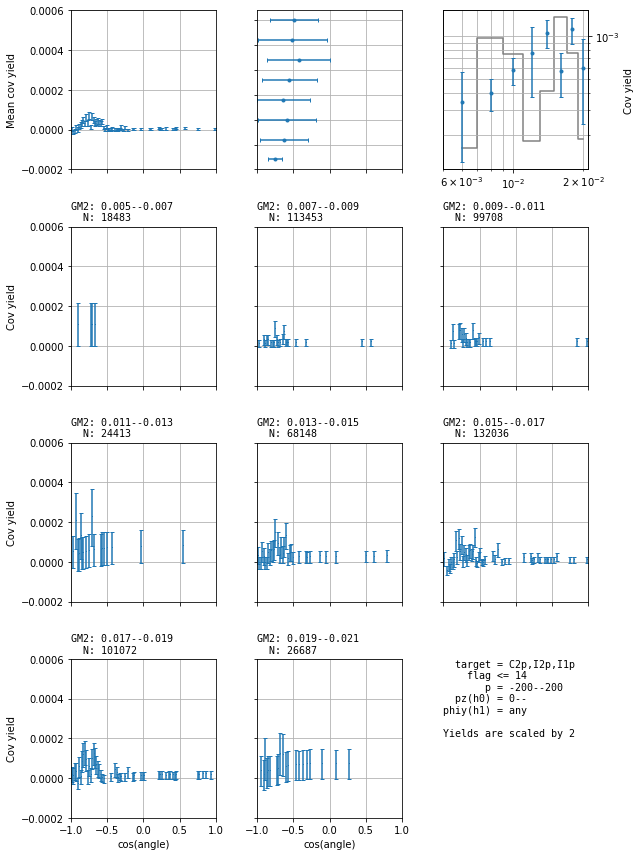

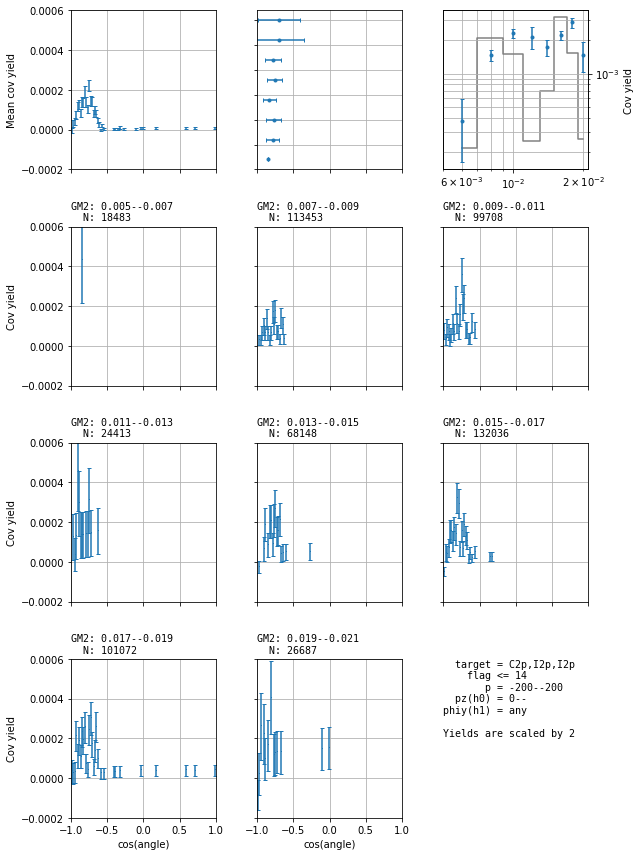

In [32]:
from textwrap import dedent
import os
import pickle
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_excel("Data/Data list.xlsx", sheet_name="Cov")
where = df["version"] == "v20190514"
info = df[where]
del df, where


step = 0.002
edges = np.arange(0.005, 0.021, step)
xkey, ykey = "cosang", "h1h2angle"

for _, m in info.iterrows():
    note = dedent("""\
          target = {target}
            flag {flag}
               p = {p}
          pz(h0) = {h0pz}
        phiy(h1) = {h1phiy}

        Yields are scaled by {scale}\
        """.format_map(m.replace("=", "= ", regex=True)))


    def gen():
        for i, fr in enumerate(edges):
            to = fr + step
            fn = "Data/{}".format(m["data"].format(fr=fr, to=to, **m))
            if not os.path.exists(fn):
                continue

            with open(fn, "rb") as fp:
                yield {"i": i,
                       "d": pickle.load(fp),
                       "fr": fr,
                       "to": to}


    rows = list(gen())
    if len(rows) == 0:
        continue

    plt.figure(figsize=(9, 12))
    plt.subplot(4, 3, 1)
    plt.xlabel("cos(angle)")
    plt.ylabel("Mean cov yield")
    n = sum(r["d"]["N"] for r in rows)
    d = {
        "Cov[X,Y,Z]": sum(r["d"]["N"] * r["d"]["Cov[X,Y,Z]"] for r in rows) / n,
        "Err[Cov[X,Y,Z]]": (sum((r["d"]["N"] * r["d"]["Err[Cov[X,Y,Z]]"]) ** 2
                                for r in rows)
                            ** 0.5 / n),
        "Sum[XYZ]": sum(r["d"]["Sum[XYZ]"] for r in rows),
    }
    dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
    where = 1 < d["Sum[XYZ]"][ykey]
    plt.errorbar(
        d["Cov[X,Y,Z]"][xkey][where] + dx / 2,
        m["scale"] * d["Cov[X,Y,Z]"][ykey][where],
        m["scale"] * d["Err[Cov[X,Y,Z]]"][ykey][where],
        fmt=" ",
        capsize=2,
    )
    plt.grid(True)
    plt.xlim(-1, 1)
    plt.ylim(-0.0002, 0.0006)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            n = r["d"]["N"]
            dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
            where = 0 < r["d"]["Sum[XYZ]"][ykey]
            if where.sum() == 0:
                continue

            ave = np.average(
                r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            )
            std = np.average(
                (r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2 - ave) ** 2,
                weights=r["d"]["Cov[X,Y,Z]"][ykey][where],
            ) ** 0.5
            if not np.isfinite(std):
                continue
            yield {"x": ave, "xerr": std, "y": (r["fr"] + r["to"]) / 2}


    plt.subplot(4, 3, 2)
    plt.xlabel("cos(angle)")
    plt.ylabel("GM2")
    df = pd.DataFrame(list(gen()))
    plt.errorbar(
        df["x"], df["y"],
        xerr=df["xerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(-1, 1)
    plt.ylim(0.005, 0.021)
    plt.grid(True)
    plt.gca().label_outer()


    def gen():
        for r in rows:
            y = r["d"]["Cov[X,Y,Z]"][ykey].sum().values
            yerr = ((r["d"]["Err[Cov[X,Y,Z]]"][ykey] ** 2).sum() ** 0.5).values
            if y < 0:
                continue
            yield {"x": (r["fr"] + r["to"]) / 2,
                   "n": r["d"]["N"],
                   "y": y,
                   "yerr": yerr}


    plt.subplot(4, 3, 3)
    df = pd.DataFrame(list(gen()))
    plt.step(
        df["x"], df["n"],
        where="mid",
        color="gray",
    )
    plt.ylim(0, None)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.yticks([], [])

    plt.twinx()
    plt.ylabel("Cov yield")
    plt.errorbar(
        df["x"],
        m["scale"] * df["y"],
        m["scale"] * df["yerr"],
        fmt=".",
        capsize=2,
    )
    plt.xlim(0.005, 0.021)
    plt.minorticks_on()
    plt.grid(True, which="both")
    plt.xscale("log")
    plt.yscale("log")


    for r in rows:
        n = r["d"]["N"]
        dx = r["d"]["Cov[X,Y,Z]"][xkey][1] - r["d"]["Cov[X,Y,Z]"][xkey][0]
        where = r["d"]["Sum[XYZ]"][ykey] != 0

        plt.subplot(4, 3, r["i"] + 4)
        plt.title(f"GM2: {r['fr']:.3f}--{r['to']:.3f}\n"
                f"  N: {n}",
                fontdict={"family": "monospace", "size": "medium"},
                loc="left")
        plt.xlabel("cos(angle)")
        plt.ylabel("Cov yield")
        plt.errorbar(
            r["d"]["Cov[X,Y,Z]"][xkey][where] + dx / 2,
            m["scale"] * r["d"]["Cov[X,Y,Z]"][ykey][where],
            m["scale"] * r["d"]["Err[Cov[X,Y,Z]]"][ykey][where],
            fmt=",",
            capsize=2,
        )
        plt.grid(True)
        plt.xlim(-1, 1)
        plt.ylim(-0.0002, 0.0006)
        plt.gca().label_outer()
    plt.subplot(4, 3, 12)
    plt.text(0, 1, note,
            fontdict={"family": "monospace"},
            verticalalignment="top")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("Figures/Cov ang dist h1-h2; target={target}.png".format_map(m))
    plt.show()